In [ ]:
""" given
import matplotlib.pyplot as plt
import mplleaflet
import pandas as pd

def leaflet_plot_stations(binsize, hashid):

    df = pd.read_csv('data/C2A2_data/BinSize_d{}.csv'.format(binsize))

    station_locations_by_hash = df[df['hash'] == hashid]

    lons = station_locations_by_hash['LONGITUDE'].tolist()
    lats = station_locations_by_hash['LATITUDE'].tolist()

    plt.figure(figsize=(8,8))

    plt.scatter(lons, lats, c='r', alpha=0.7, s=200)

    return mplleaflet.display()

leaflet_plot_stations(400,'fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89')
"""

" given\nimport matplotlib.pyplot as plt\nimport mplleaflet\nimport pandas as pd\n\ndef leaflet_plot_stations(binsize, hashid):\n\n    df = pd.read_csv('data/C2A2_data/BinSize_d{}.csv'.format(binsize))\n\n    station_locations_by_hash = df[df['hash'] == hashid]\n\n    lons = station_locations_by_hash['LONGITUDE'].tolist()\n    lats = station_locations_by_hash['LATITUDE'].tolist()\n\n    plt.figure(figsize=(8,8))\n\n    plt.scatter(lons, lats, c='r', alpha=0.7, s=200)\n\n    return mplleaflet.display()\n\nleaflet_plot_stations(400,'fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89')\n"

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
df = pd.read_csv(r'fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89.csv')
df.head()

,ID,Date,Element,Data_Value
0,USW00094889,2014-11-12,TMAX,22
1,USC00208972,2009-04-29,TMIN,56
2,USC00200032,2008-05-26,TMAX,278
3,USC00205563,2005-11-11,TMAX,139
4,USC00200230,2014-02-27,TMAX,-106


In [ ]:
df.sort_values('Date', inplace=True)
df.Data_Value = df.Data_Value*0.1 # change to Celsius
df

,ID,Date,Element,Data_Value
60995,USW00004848,2005-01-01,TMIN,0.0
17153,USC00207320,2005-01-01,TMAX,15.0
17155,USC00207320,2005-01-01,TMIN,-1.1
10079,USW00014833,2005-01-01,TMIN,-4.4
10073,USW00014833,2005-01-01,TMAX,3.3
...,...,...,...,...
45691,USC00200032,2015-12-31,TMAX,1.1
10573,USC00205050,2015-12-31,TMIN,-1.7
21088,USC00208202,2015-12-31,TMAX,0.0
10253,USC00201250,2015-12-31,TMIN,-0.6


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 165085 entries, 60995 to 29410
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   ID          165085 non-null  object 
 1   Date        165085 non-null  object 
 2   Element     165085 non-null  object 
 3   Data_Value  165085 non-null  float64
dtypes: float64(1), object(3)
memory usage: 6.3+ MB


In [ ]:
df.isnull().sum() # check for missing values

ID            0
Date          0
Element       0
Data_Value    0
dtype: int64

In [ ]:
# parse Date into 'Year' & 'Date2'
df['Year'] = df['Date'].apply(lambda x: x[:4])
df['Date2'] = df['Date'].apply(lambda x: x[-5:])
df.sort_values(by=['ID', 'Date'], inplace=True)

In [ ]:
# drop leap day (02-29)
df = df[df['Date2'] != '02-29']


In [ ]:
# check if leap day dropped?
print('02-29' in df.Date2)

False


In [ ]:
# separate 2005-2014 bin from 2015
df_0514 = df[df['Year'] != '2015']
df_15 = df[df['Year'] == '2015']


In [ ]:
# daily TMIN & TMAX for over 2005-2014 & in 2015
TMAX_0514 = df_0514.groupby('Date2').agg({'Data_Value':np.max})
TMIN_0514 = df_0514.groupby('Date2').agg({'Data_Value':np.min})
TMAX_15 = df_15.groupby('Date2').agg({'Data_Value':np.max})
TMIN_15 = df_15.groupby('Date2').agg({'Data_Value':np.min})
TMAX_15

,Data_Value
Date2,
01-01,1.1
01-02,3.9
01-03,3.9
01-04,4.4
01-05,2.8
...,...
12-27,8.3
12-28,6.1
12-29,10.0


In [184]:
# identify global TMAX & TMIN data points of 2015
global_MAX = np.where(TMAX_15['Data_Value'] > TMAX_0514['Data_Value'])
global_MIN = np.where(TMIN_15['Data_Value'] < TMIN_0514['Data_Value'])

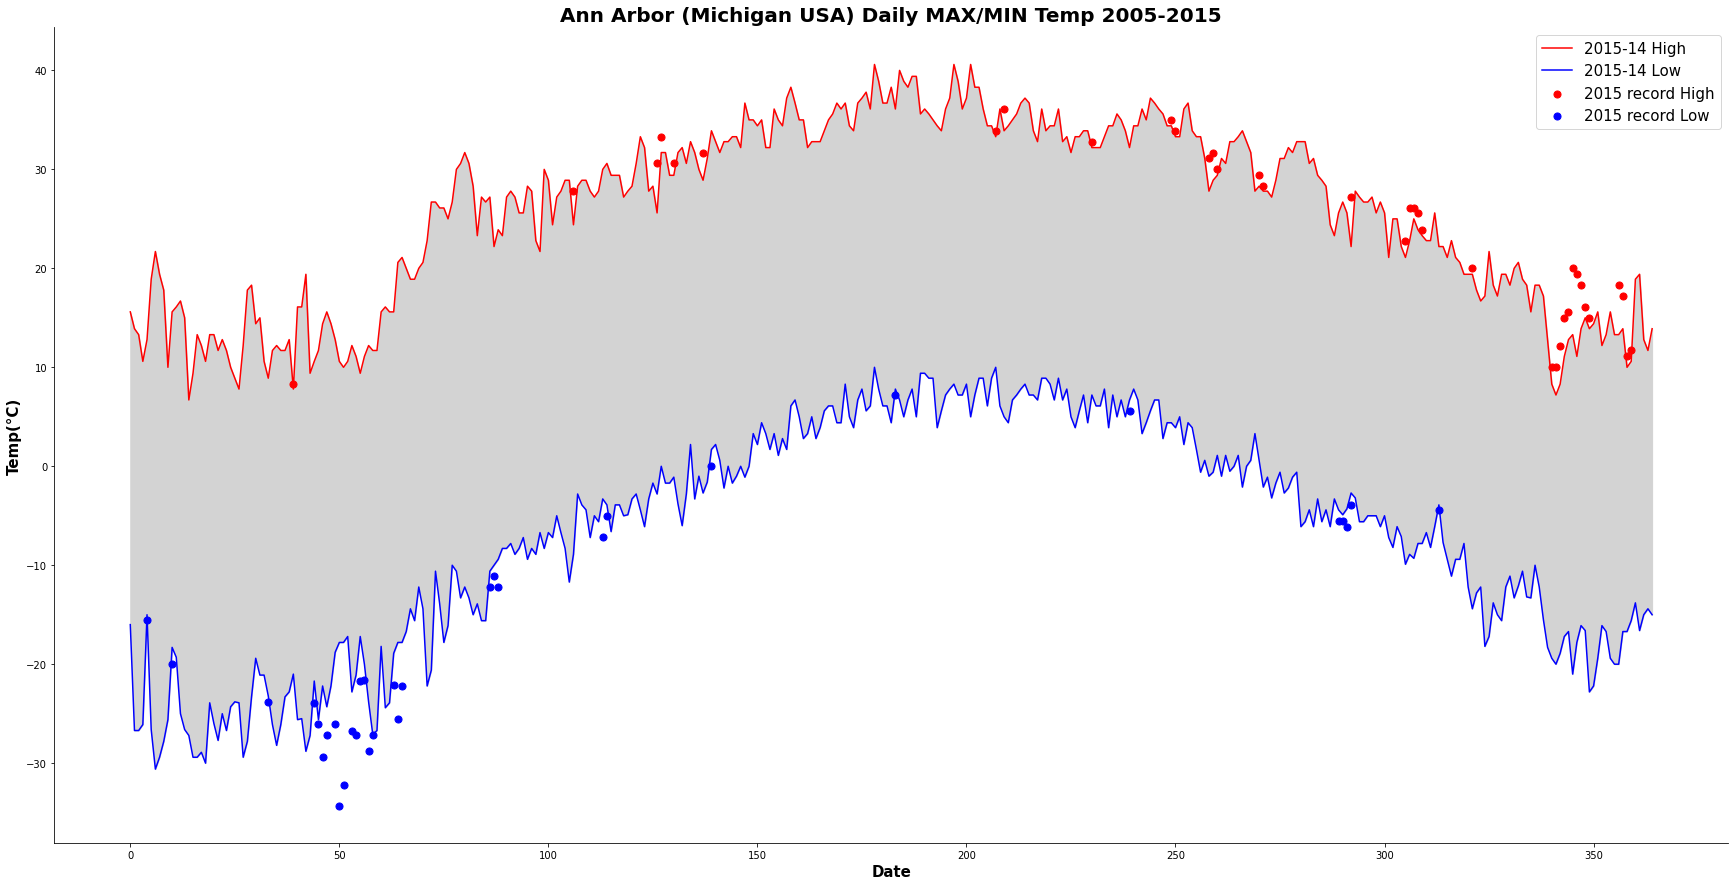

In [217]:
plt.figure(figsize=(30,15))
# line plot for data for 2015-2014
plt.plot(TMAX_0514.values, c='r', label='2015-14 High')
plt.plot(TMIN_0514.values, c='b', label='2015-14 Low')
# fill area between MIN/MAX
plt.fill_between(range(len(TMAX_0514)), TMAX_0514['Data_Value'], TMIN_0514['Data_Value'], color='lightgray')
# scatter plot for broken TMAX, TMIN (if any) occured in 2015
plt.scatter(global_MAX, TMAX_15.iloc[global_MAX], s=50, c='r', label='2015 record High')
plt.scatter(global_MIN, TMIN_15.iloc[global_MIN], s=50, c='b', label='2015 record Low')
# set graph
plt.title('Ann Arbor (Michigan USA) Daily MAX/MIN Temp 2005-2015', fontsize=20, fontweight='bold')
plt.legend(loc=0, fontsize=15)
plt.xlabel('Date', fontsize=15, fontweight='bold')
plt.ylabel('Temp(°C)', fontsize=15, fontweight='bold')

# simplify graph
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
